# Running PC Algorithm

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_context('talk')
from sklearn.preprocessing import StandardScaler
from causallearn.search.ConstraintBased.PC import pc
from causallearn.utils.PDAG2DAG import pdag2dag
from helpers import *

In [3]:
# getting data
all_data, combined_data = get_fmri_data()

Approaches: 
1. run PC on part 1, subject 1, compare with running PC on part 2, subject 1, etc. -- enough data points?
2. run PC on subject 1, compare with running PC on subject 2, etc.
3. run PC, averaging over multiple subjects, and compare with correlation matrix of single non-train subject

Questions:
- should I be comparing PC results with other PC results or PC results with ground truth correlations?
- how to get estimated correlation matrix from multiple PC runs? just add and average?

## Running pc on each combined subject with multiple subsampling runs

> each subject has 1976 data points, subsampling into 4 subsamples of 494 samples each, 2 times

In [ ]:
num_samples = 494
num_samplings = 2

avg_adj_mats = []
for i in range(1, 17):
    subject_data = combined_data[f's{i:02d}']
    avg_adj_mat = pc_get_avg_adj_matrix(subject_data, num_samples, num_samplings)
    avg_adj_mats.append(avg_adj_mat)

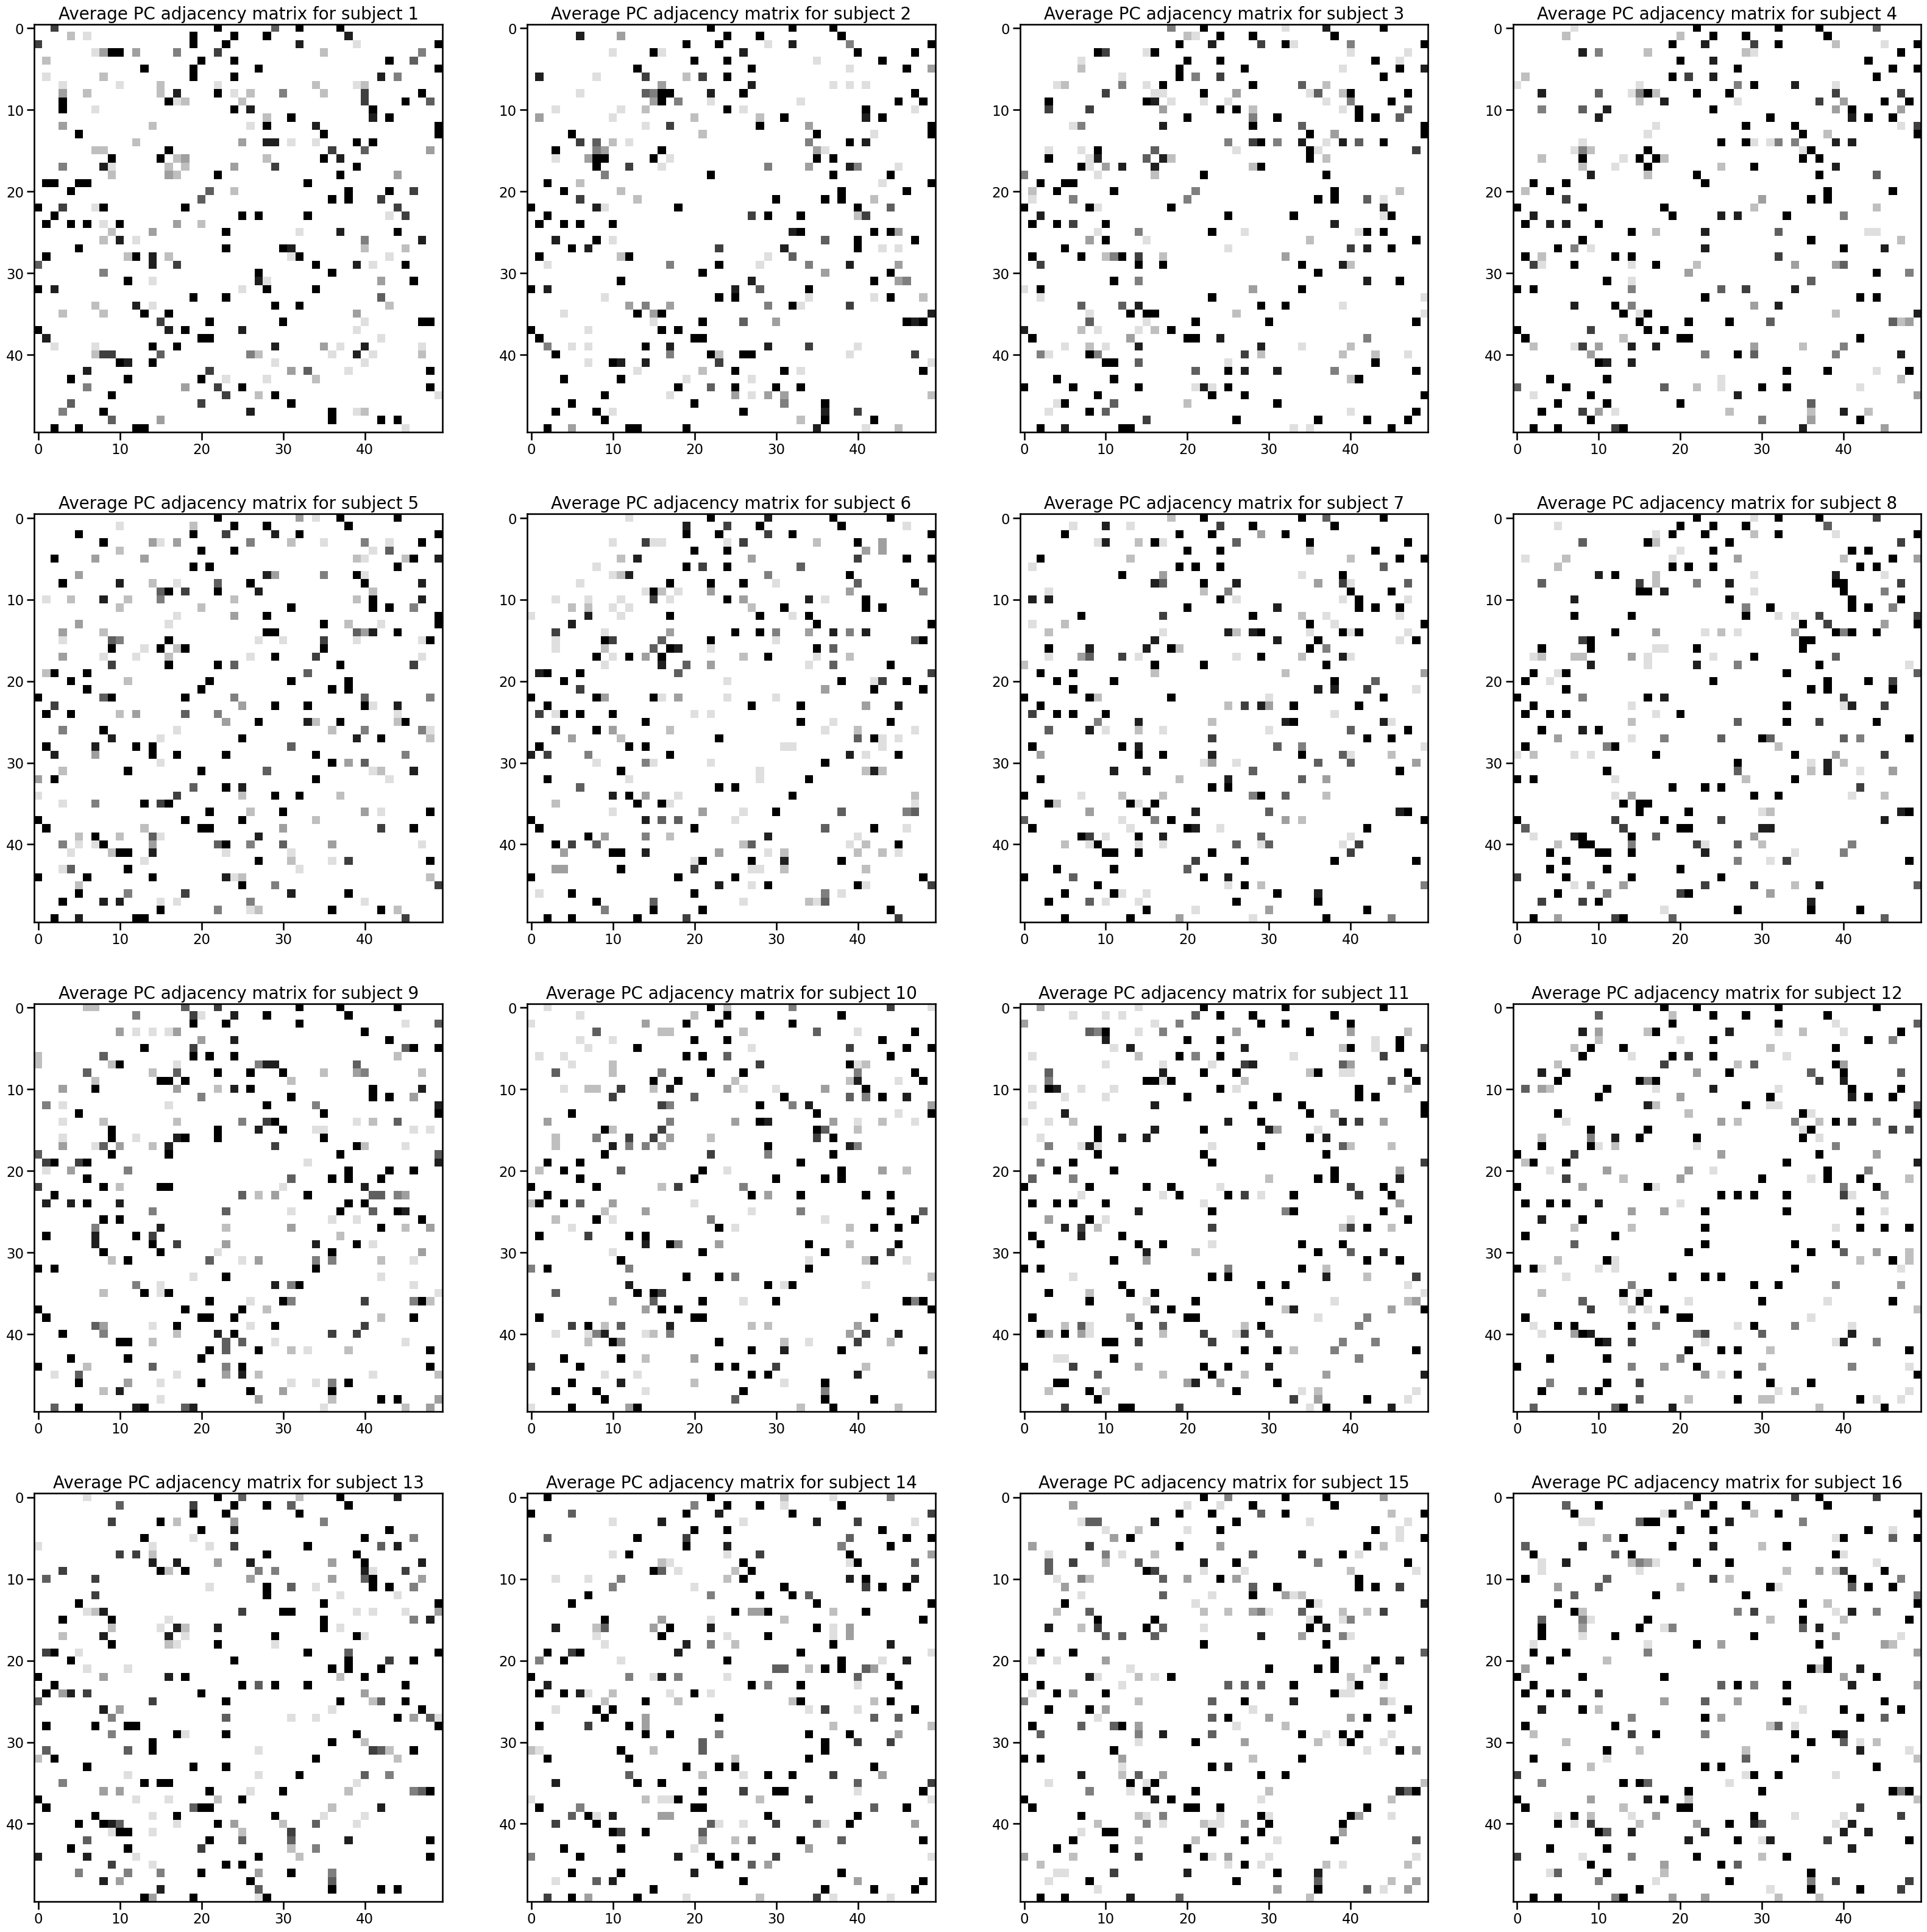

In [5]:
fig, axs = plt.subplots(4, 4, figsize=(40,40))

for i, ax in enumerate(axs.flatten()):
    ax.imshow(avg_adj_mats[i], cmap='binary', interpolation='nearest')
    ax.set_title(f'Average PC adjacency matrix for subject {i+1}', fontsize=20)

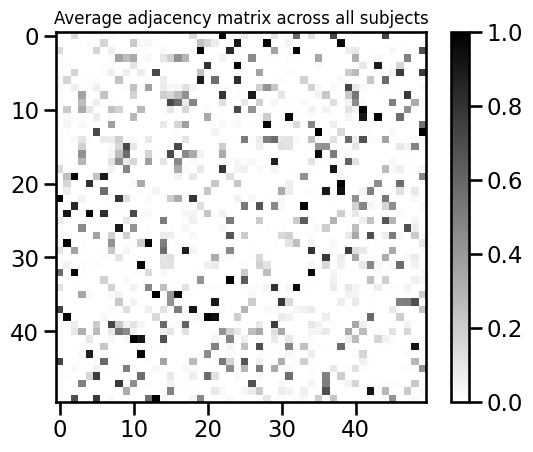

In [13]:
results_avg = np.mean(avg_adj_mats, axis=0)
plt.imshow(results_avg, cmap='binary', interpolation='nearest')
_ = plt.colorbar()
_ = plt.title('Average adjacency matrix across all subjects', fontsize=12)

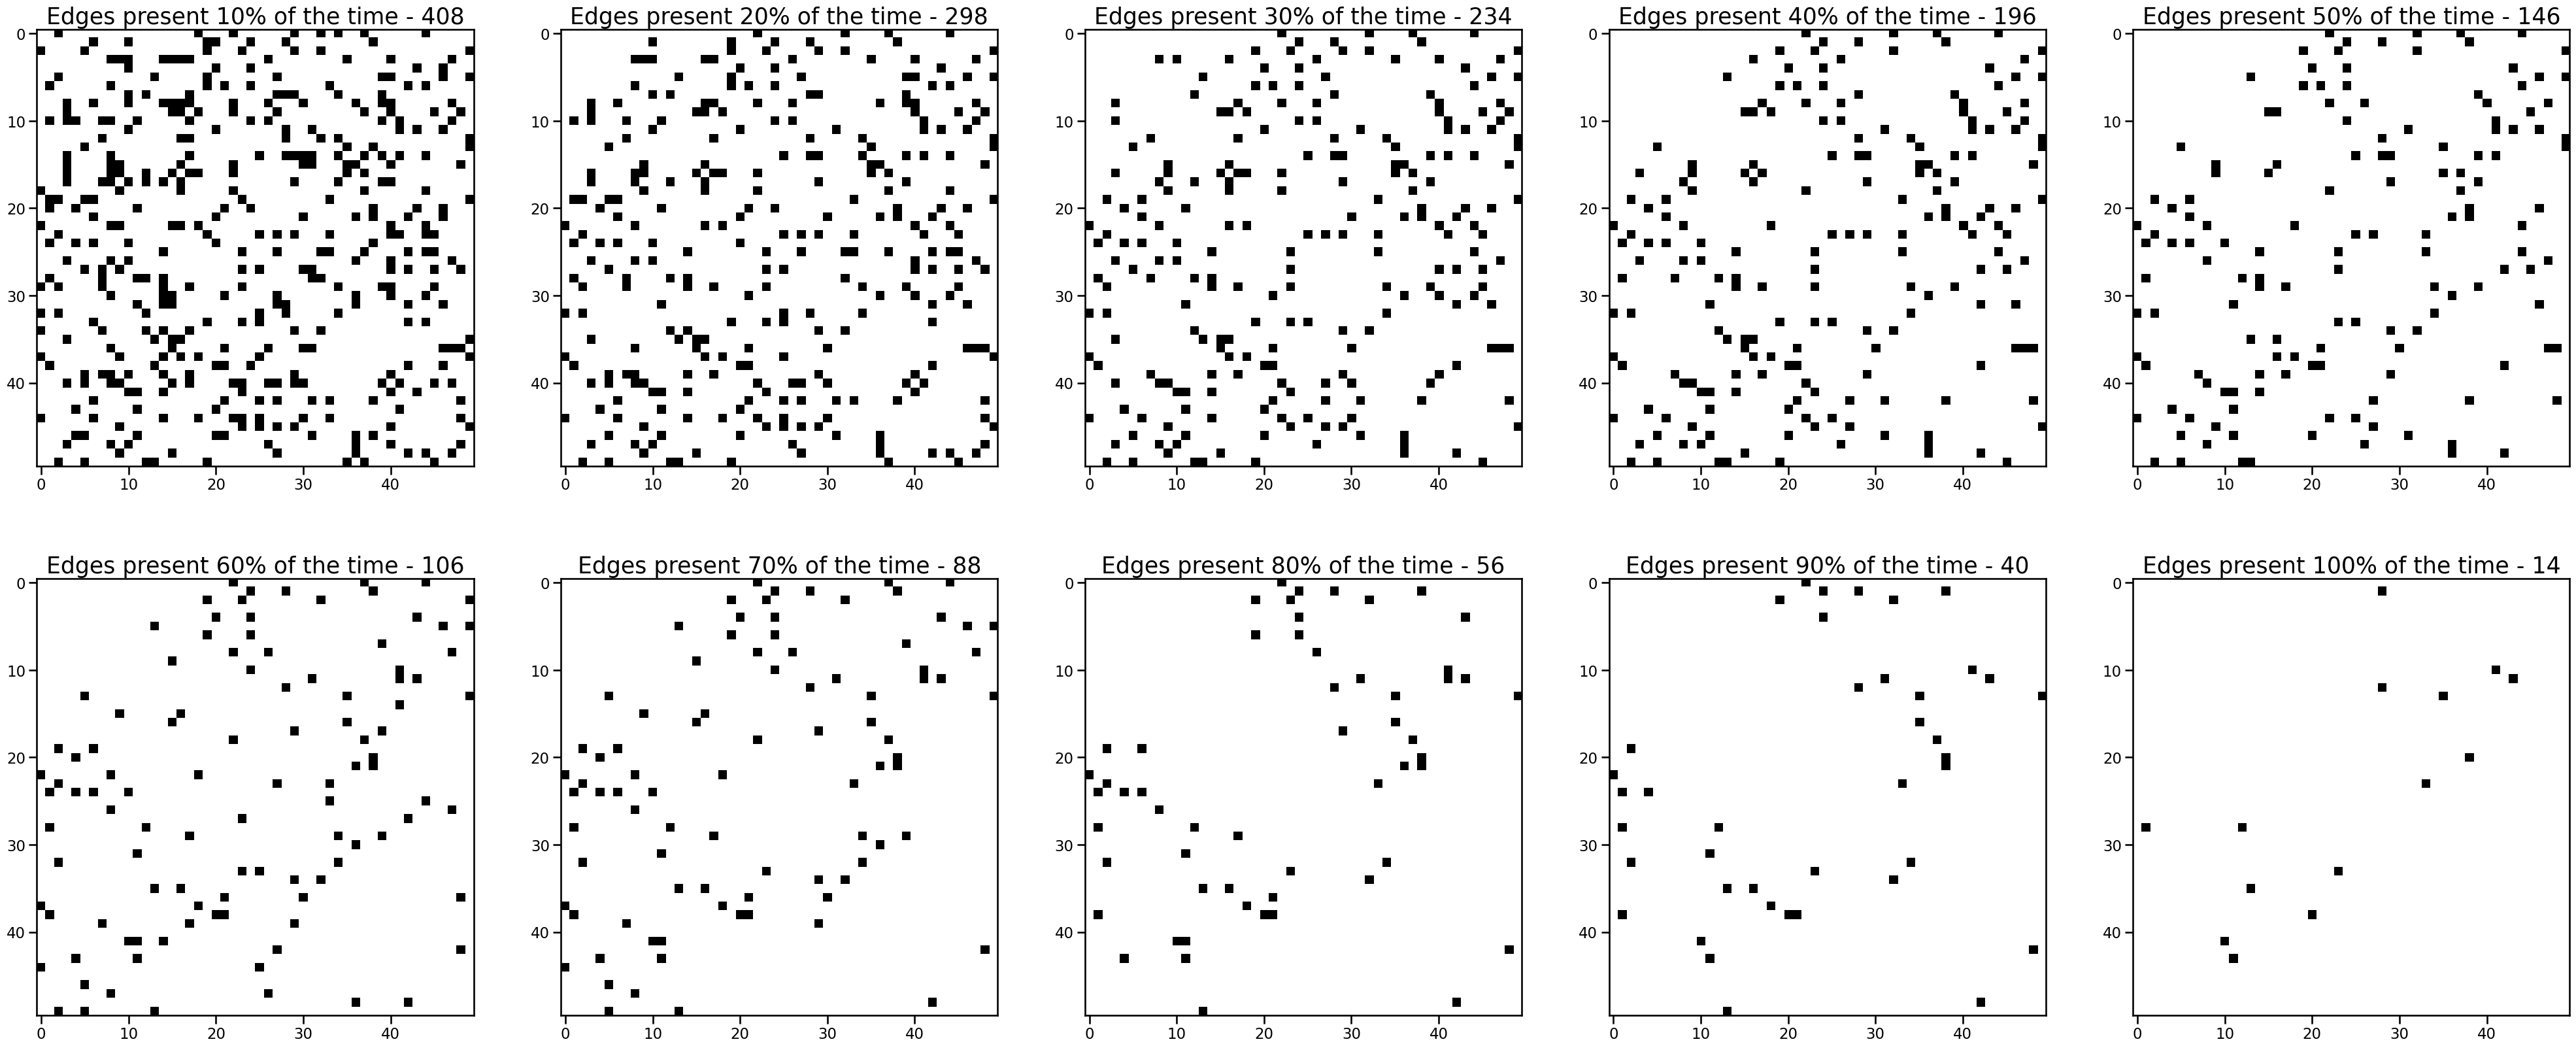

In [14]:
filtered_by_percent_edges = []

fig, axs = plt.subplots(2, 5, figsize=(50,20))
flat_axs = axs.flatten()

for i in range(1,11):
    filter_percent = i/10
    filtered_edges = np.where(results_avg >= filter_percent, 1, 0)

    num_adj_edges = np.sum(filtered_edges)

    ax = flat_axs[i-1]
    ax.imshow(filtered_edges, cmap='binary', interpolation='nearest')
    ax.set_title(f'Edges present {i*10}% of the time - {num_adj_edges}', fontsize=25)

# Use information about variance across subjects? 